# ASSIGNMENT 1 EE:240 PATTERN RECOGNITION AND MACHINE LEARNING
  *NAME: NITYASH GAUTAM*
  
  *SID: 862395403*

  *UCR Email: ngaut006@ucr.edu*


## H 2.1

Logistic regression: Suppose we have labeled data (xi, yi).  We want to compute w that minimizes the following negative log-likelihood function:

$$minimize_w ∑^N_{i=1}y_ilog(1+exp(-w^Tx_i)) + (1-y_i)log(1+exp(w^Tx_i))$$

### (a) Show the the following log-logistic function is convex: (10 pts)

$$f(w) = log(1 + exp(−w^T x))$$

You may assume that *x* is a scalar and show that the second derivative of *f(w)* w.r.t. *w* is always positive.



> **SOLUTION**



To show that the function $f(w) = \log(1+\exp(-w^⊤x))$ is convex, we need to show that its $2^{nd}$ derivative with respect to $w$ is always positive.

*   Finding the derivative of $f(w)$ with respect to $w$:
$$f'(w) = -x\frac{exp(-w^Tx}{1+exp(-w^Tx}$$

*  Finding the second derivative of $f(w)$ with respect to $w$:
$$f''(w) = \frac{x^2exp(-w^Tx)^2}{(1+exp(-w^Tx))^2}-\frac{x^2exp(-w^Tx)}{(1+exp(-w^Tx))^2}$$

To simplify, we see that 

$(1 + \exp(-w^\top x))^2 = (1 + \exp(-w^\top x))(1 + \exp(-w^\top x)) = 1 + 2\exp(-w^\top x) + \exp(-2w^\top x)$. 

In order to further simplify the expression for $f''(w)$:

$$f''(w) = \frac{x^2exp(-w^Tx)^2}{1+2exp(-w^Tx) + exp(-2w^Tx)} - \frac{x^2exp(-w^Tx}{(1+2exp(-w^Tx) + exp(-2w^Tx))^2}$$

Let, $z = \exp(-w^⊤x)$

$$f''(w) = \frac{x^2z^2}{1+2z+z^2} - \frac{x^2z}{(1+2z+z^2)^2}$$

In order to show $f''(w)$ is positive, both the numerator and the denominator have to be proven positve!

As $x$ and $exp(-2w^Tx)$ are positive => their products are +ve as well.

*Therefore, the numerator is proven to be positive*

Considering the denominator:

$1+2z+z^2 = (1+z)^2$

Square of any quantity is positive, hence, $(1+z)^2$ is also positve.

*This establihsed the fact that the denominator is also positive*

**Since the Numerator and the Denominator, both are positive, $f''(w)$ is always positive**


> **Hence, $f(w) = log(1 + exp(−w^T x))$ is a convex function.**






### (b) (40 pts) 

Next you will write a Python script for logistic regression that solves (1) using gradient descent algorithm with a fixed step size 
. You will then use your code to learn to classify images of digits from the MNIST dataset.

#### Essential Imports

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn import svm

#### Getting the Data

In [2]:
# Load the MNIST dataset
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Choose only two digits
class_0 = '3'
class_1 = '1'
X0 = X[y==class_0,:]
X1 = X[y==class_1,:]
y0 = np.zeros(X0.shape[0], int)
y1 = np.ones(X1.shape[0], int)
train_x = np.concatenate((X0, X1), axis=0)
train_y = np.concatenate((y0, y1), axis=0)

X0 = X[y==class_0,:]
X1 = X[y==class_1,:]
y0 = np.zeros(X0.shape[0], int)
y1 = np.ones(X1.shape[0], int)
test_x = np.concatenate((X0, X1), axis=0)
test_y = np.concatenate((y0, y1), axis=0)

In [4]:
# Append 1 for the constant term b
train_x = np.insert(train_x, 0, 1, axis=1)
test_x = np.insert(test_x, 0, 1, axis=1)

#### Helper Functions

In [5]:
# Define a sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
# Define the gradient function
def gradient(y, x, w):
    hwx = sigmoid(np.matmul(x, w))
    return -np.matmul(x.T, (y - hwx))

In [7]:
# Define the logistic regression function
def logistic_regression(train_x, train_y, test_x, test_y, alpha, num_epochs):
    # Initialize weights
    w = np.zeros(train_x.shape[1])
    # Perform gradient descent
    for epoch in range(num_epochs):
        grad = gradient(train_y, train_x, w)
        w -= alpha * grad
    # Make predictions
    predict = np.round(sigmoid(np.matmul(test_x.astype(float), w)))
    # Calculate accuracy
    acc = 100.0 * np.sum(test_y == predict) / test_y.shape[0]
    return w, acc

#### Testing the Script for Logistic Regression

In [8]:
# Set hyperparameters
alpha = 0.001
num_epochs = 1000

# Train the logistic regression model
w, acc = logistic_regression(train_x, train_y, test_x, test_y, alpha, num_epochs)

print("Accuracy: {:.2f}%".format(acc))

<ipython-input-5-70391257642b>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy: 99.51%


## H 2.2  (50 pts)

Perceptron learning algorithm (PLA) and kernel extension: In this problem you will implement PLA to build a simple binary classification system. Suppose we have labeled data $(x_i, y_i)$ , where $x_i∈ R^{d+1}$ with $x_i(1) = 1$ and $y∈(−1, +1)$. Let us define $h_w(x_i) = sign (w^T x_i)$. We want to compute w using
PLA.

### (a) **Data Processing:** 
Generate two examples of 2D linearly separable dataset with N = 100 samples each. (To do this, you will first generate a weight vector and constant term, *w*, and then assign
±1 labels to your data samples as $y_i = h_w(x_i)$.) Let us call the two datasets “Data1” and “Data2”. For Data1, randomly select 80% of the samples for training and the remaining 20% for testing on Data1 (80/20). For Data2, randomly select 30% of the samples for training and the remaining 70% for testing (30/70).

#### Preparing the Data for the Task

In [9]:
# Generate two linearly separable datasets with N = 100 samples each
np.random.seed(0)
w_true = np.random.rand(3)  # Generate a random weight vector
w_true /= np.linalg.norm(w_true)  # Normalize the weight vector
N = 100
X1 = np.random.uniform(-1, 1, (N, 2))
X1 = np.insert(X1, 0, 1, axis=1)  # Add a column of ones for the bias term
y1 = np.sign(np.matmul(X1, w_true))
X2 = np.random.uniform(-1, 1, (N, 2))
X2 = np.insert(X2, 0, 1, axis=1)
y2 = np.sign(np.matmul(X2, w_true))

# Randomly split Data1 into training and testing sets (80/20 split)
train_pct = 0.8
num_train = int(train_pct * N)
idx = list(range(N))
random.shuffle(idx)
train_idx = idx[:num_train]
test_idx = idx[num_train:]
train_x1 = X1[train_idx]
train_y1 = y1[train_idx]
test_x1 = X1[test_idx]
test_y1 = y1[test_idx]

# Randomly split Data2 into training and testing sets (30/70 split)
train_pct = 0.3
num_train = int(train_pct * N)
idx = list(range(N))
random.shuffle(idx)
train_idx = idx[:num_train]
test_idx = idx[num_train:]
train_x2 = X2[train_idx]
train_y2 = y2[train_idx]
test_x2 = X2[test_idx]
test_y2 = y2[test_idx]


#### Helper Functions

In [10]:
def accuracy(X, y, w):
    return np.mean(np.sign(np.matmul(X, w)) == y)

#### Main PERCEPTRON LEARNING ALGORITHM function

In [11]:
def pla_prev(X, y, X_val=None, y_val=None):
    w = np.zeros(X.shape[1])
    num_mistakes = 1
    prev_acc = 0
    while num_mistakes > 0:
        num_mistakes = 0
        for i in range(X.shape[0]):
            if np.sign(np.dot(X[i], w)) != y[i]:
                w += y[i] * X[i]
                num_mistakes += 1
        if X_val is not None and y_val is not None:
            cur_acc = accuracy(X_val, y_val, w)
            if cur_acc <= prev_acc:
                break
            else:
                prev_acc = cur_acc
    return w

#### Training and Testing the PLA on Data 1

In [12]:
# Train PLA on Data1
w1 = pla_prev(train_x1, train_y1, X_val=test_x1, y_val=test_y1)
train_acc1 = accuracy(train_x1, train_y1, w1)
test_acc1 = accuracy(test_x1, test_y1, w1)
print(f"Data1: Training accuracy = {train_acc1:.2f}, Testing accuracy = {test_acc1:.2f}")

Data1: Training accuracy = 0.97, Testing accuracy = 1.00


#### Training and Testing the PLA on Data 2

In [13]:
# Train PLA on Data2
w2 = pla_prev(train_x2, train_y2, X_val=test_x2, y_val=test_y2)
train_acc2 = accuracy(train_x2, train_y2, w2)
test_acc2 = accuracy(test_x2, test_y2, w2)
print(f"Data2: Training accuracy = {train_acc2:.2f}, Testing accuracy = {test_acc2:.2f}")

Data2: Training accuracy = 1.00, Testing accuracy = 0.90


### (b) **Implementation:** 
Write a script for PLA in Python by initializing w = 0 and using the followingupdate rule:

> for i = 1,......., N
$$ w = w + \frac{1}{2}(y_i-h_w(x_i))x_i$$



In [14]:
def pla(X, y):
    w = np.zeros(X.shape[1])
    num_mistakes = 1
    while num_mistakes > 0:
        num_mistakes = 0
        for i in range(X.shape[0]):
            if np.sign(np.dot(X[i], w)) != y[i]:
                w += 0.5 * (y[i] - np.sign(np.dot(X[i], w))) * X[i]
                num_mistakes += 1
    return w

### (c) **Training:**
Use your PLA implementation to train two linear classifiers for Data1 and Data2using the respective training samples. Plot the training samples, test samples, and separation lines for both examples in two separate plots.

#### Training PLA, Computing Decision Boundary and Getting the Plot for **DATA 1**

Text(0.5, 1.0, 'Data1')

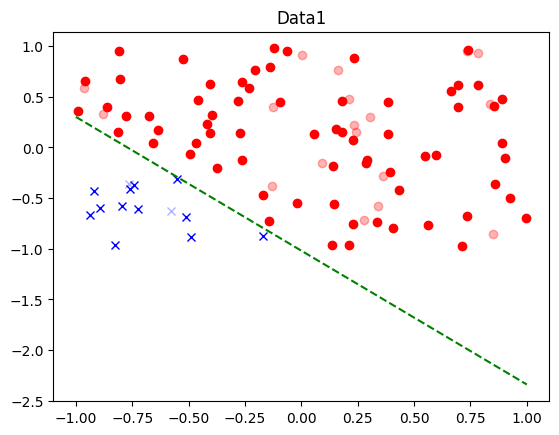

In [15]:
# Train PLA on Data1
w1 = pla(train_x1, train_y1)

# Compute the decision boundary for Data1
x1_plot = np.array([-1, 1])
y1_plot = -(w1[1] * x1_plot + w1[0]) / w1[2]

# Plot the training samples, test samples, and decision boundary for Data1
plt.figure()
plt.plot(train_x1[:,1][train_y1==1], train_x1[:,2][train_y1==1], 'ro')
plt.plot(train_x1[:,1][train_y1==-1], train_x1[:,2][train_y1==-1], 'bx')
plt.plot(test_x1[:,1][test_y1==1], test_x1[:,2][test_y1==1], 'ro', alpha=0.3)
plt.plot(test_x1[:,1][test_y1==-1], test_x1[:,2][test_y1==-1], 'bx', alpha=0.3)
plt.plot(x1_plot, y1_plot, 'g--')
plt.title('Data1')

#### Training PLA, Computing Decision Boundary and Getting the Plot for **DATA 2**

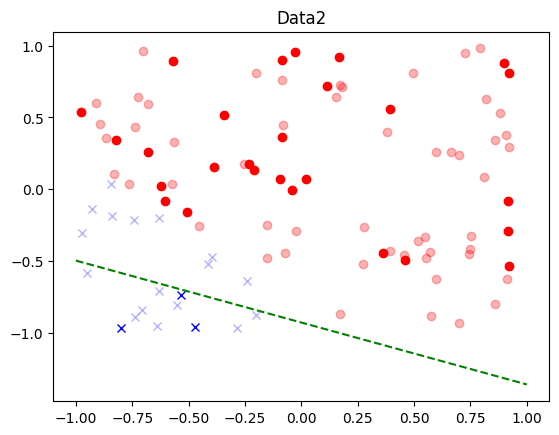

In [16]:
# Train PLA on Data2
w2 = pla(train_x2, train_y2)

# Compute the decision boundary for Data2
x2_plot = np.array([-1, 1])
y2_plot = -(w2[1] * x2_plot + w2[0]) / w2[2]

# Plot the training samples, test samples, and decision boundary for Data2
plt.figure()
plt.plot(train_x2[:,1][train_y2==1], train_x2[:,2][train_y2==1], 'ro')
plt.plot(train_x2[:,1][train_y2==-1], train_x2[:,2][train_y2==-1], 'bx')
plt.plot(test_x2[:,1][test_y2==1], test_x2[:,2][test_y2==1], 'ro', alpha=0.3)
plt.plot(test_x2[:,1][test_y2==-1], test_x2[:,2][test_y2==-1], 'bx', alpha=0.3)
plt.plot(x2_plot, y2_plot, 'g--')
plt.title('Data2')

plt.show()

### (d) **Testing:**
Using the test samples in each example, compute precision, recall, and f1-score for your classifiers.

Precision is defined as $\frac{tp}{tp+fp}$; *tp* and *fp* denote the number of true and false positives.

Recall is defined as $\frac{tp}{tp + fn}$; *fn* denotes the number of false negatives.

f1-score is defined as $2\frac{precision X recall}{precision + recall}$; it can be viewed as a measure of accuracy and ranges
between 0 (worst) and 1 (best).

#### Computations for **DATA 1**

In [17]:
# Compute predictions for Data1
y_pred1 = np.sign(np.dot(test_x1, w1))

# Compute TP, FP, FN, and TN for Data1
TP1 = np.sum((y_pred1 == 1) & (test_y1 == 1))
FP1 = np.sum((y_pred1 == 1) & (test_y1 == -1))
FN1 = np.sum((y_pred1 == -1) & (test_y1 == 1))
TN1 = np.sum((y_pred1 == -1) & (test_y1 == -1))

# Compute precision, recall, and F1-score for Data1
precision1 = TP1 / (TP1 + FP1)
recall1 = TP1 / (TP1 + FN1)
f1_score1 = 2 * (precision1 * recall1) / (precision1 + recall1)
print("Data1: Precision = {:.2f}, Recall = {:.2f}, F1-score = {:.2f}".format(precision1, recall1, f1_score1))

Data1: Precision = 1.00, Recall = 1.00, F1-score = 1.00


#### Computations for **DATA 2**

In [18]:
# Compute predictions for Data2
y_pred2 = np.sign(np.dot(test_x2, w2))

# Compute TP, FP, FN, and TN for Data2
TP2 = np.sum((y_pred2 == 1) & (test_y2 == 1))
FP2 = np.sum((y_pred2 == 1) & (test_y2 == -1))
FN2 = np.sum((y_pred2 == -1) & (test_y2 == 1))
TN2 = np.sum((y_pred2 == -1) & (test_y2 == -1))

# Compute precision, recall, and F1-score for Data2
precision2 = TP2 / (TP2 + FP2)
recall2 = TP2 / (TP2 + FN2)
f1_score2 = 2 * (precision2 * recall2) / (precision2 + recall2)
print("Data2: Precision = {:.2f}, Recall = {:.2f}, F1-score = {:.2f}".format(precision2, recall2, f1_score2))

Data2: Precision = 0.85, Recall = 1.00, F1-score = 0.92


### (e) **Kernel Perceptron:**
Note that we can define the weight vector as $w = ∑_{i=1}^Nα_iy_ix_i$. We can view this as the dual perceptron in which we initialize $α_i$ = 0 for i = 1, . . . ,N and update them as
follows.

for j=1,...,N

$$ŷ = sign(∑_{i=1}^Nα_iy_ix_i^Tx_j)$$

If $ŷ \neq y_j$, update $α_j = α_j +1$

Implement the kernel perceptron and demonstrate that the classifier you learn is identical to
the one in step (b).

In [19]:
# Define the kernel function
def kernel(x, y):
    return np.dot(x, y)

# Initialize alpha to zero
alpha = np.zeros(train_y.shape[0])

# Compute the Gram matrix
K = np.zeros((train_x.shape[0], train_x.shape[0]))
for i in range(train_x.shape[0]):
    for j in range(train_x.shape[0]):
        K[i,j] = kernel(train_x[i], train_x[j])

# Train the kernel perceptron
for j in range(train_x.shape[0]):
    y_pred = np.sign(np.dot(alpha*train_y, K[:,j]))
    if y_pred != train_y[j]:
        alpha[j] += 1

# Compute the weight vector
w_kernel = np.sum(alpha.reshape(-1,1) * train_y.reshape(-1,1) * train_x, axis=0)

# Compare the learned weight vectors
print('*'*20, " Weight vector from step 4 ", '*'*20)
print(w)
print()
print('*'*100)
print()
print('*'*20, "Weight vector from kernel perceptron ", '*'*20)
print(w_kernel)

********************  Weight vector from step 4  ********************
[ 6.25490544e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  9.55800000e+00
  2.29430000e+01  2.98750000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.

## H 2.3 (40 pts)
Use a second degree polynomial kernel to classify four samples in 2D space, distributed in an XOR pattern (i.e., points on opposite diagonals of a rectangle have same labels)

#### Defining the XOR Data

In [20]:
# Define XOR pattern data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([-1, 1, 1, -1])

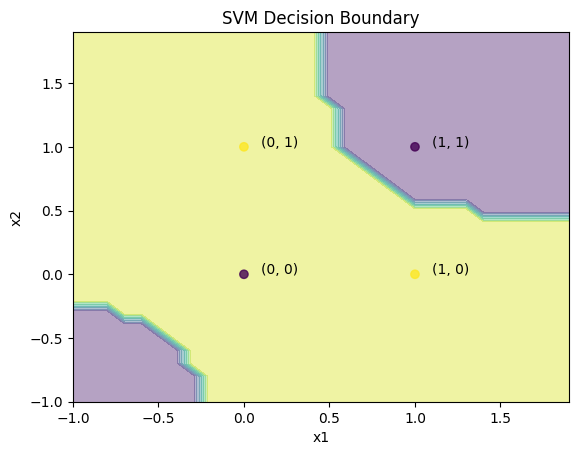

In [21]:
# Define the second-degree polynomial kernel
def polynomial_kernel(x1, x2, degree=2, coef0=1):
    return (np.dot(x1, x2) + coef0) ** degree

# Projected Gradient Descent algorithm for SVM
def projected_gradient_descent(X, y, kernel, C, tol=1e-5, max_iter=10000, learning_rate=0.01):
    n_samples = X.shape[0]
    alpha = np.zeros(n_samples)
    b = 0.0
    K = np.zeros((n_samples, n_samples))

    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = kernel(X[i], X[j])

    for _ in range(max_iter):
        grad = np.ones(n_samples) - np.dot(K * np.outer(y, y), alpha)
        alpha = alpha + learning_rate * grad

        # Project alpha back into the feasible set
        alpha = np.clip(alpha, 0, C)

        # Update bias term
        support_vectors = (alpha > tol)
        b = np.mean(y[support_vectors] - np.dot(K[support_vectors] * y[support_vectors, np.newaxis], alpha))

    return alpha, b

# Train the SVM model
C = 1.0
alpha, b = projected_gradient_descent(X, y, polynomial_kernel, C)

# Define the prediction function
def predict(x):
    return np.sign(np.sum(alpha * y * polynomial_kernel(X, x)) + b)

# Create a meshgrid to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = np.array([predict(np.array([x, y]))
              for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

# Plot the data and decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

# Add labels to the points
point_labels = ['(0, 0)', '(0, 1)', '(1, 0)', '(1, 1)']
for i, txt in enumerate(point_labels):
    plt.annotate(txt, (X[i, 0] + 0.1, X[i, 1]), fontsize=10, color='black')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("SVM Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### (a) 
Map 2D feature vectors $x = [x(1) x(2)]^T$ using kernel function $K(x_1, x_2) = (1+x_1^T x_2)^2$, which results in 6D feature vectors: 
$$\phi(x) = [1, \sqrt2x(1), \sqrt2x(2), x(1)^2 x(2)^2, \sqrt2x(1)x(2)]^T$$
Show that the features vectors are linearly separable in the 5D space.

#### Mathematical Solution

Consider the given kernel function: $K(x_1, x_2) = (1+x_1^Tx_2)^2$

The XOR Pattern Data:

X = [(0,0), (0,1), (1,0), (1,1)]

y = [-1,1,1,-1]

Using the mapping function belwow to map 2D feature vectors to 6D feature vectors:

$$\phi(x) = [1, \sqrt2x(1), \sqrt2x(2), x(1)^2 x(2)^2, \sqrt2x(1)x(2)]$$

Transformed feature vectors for each point in X:

$\phi(0,0) = [1,0,0,0,0,0]$

$\phi(0,1) = [1,0,\sqrt2,0,1,0]$

$\phi(1,0) = [1,\sqrt2,0,1,0,0]$

$\phi(1,1) = [1,\sqrt2,\sqrt2,1,1,2]$

Checking if these transformed vectors are lineary separable in the 6D sapce. In orde to do this we check if there exists a hyperplane that is capable to seperate the +ve and -ve examples.

Considering the following hyperplane:

$w = [0,0,0,-1,0]$

$b = -0.5$

*For the +ve Examples (y = 1): (0,1) and (1,0)*

$$w^T \phi(0,1) +b = [0,0,0,1,-1,0] * [1,0,\sqrt2,0,1,0]^T - 0.5 = 1 - 0.5 > 0$$
$$w^T \phi(1,0) +b = [0,0,0,1,-1,0] * [1,\sqrt2,0,1,0,0]^T - 0.5 = 1 - 0.5 > 0$$

*For the +ve Examples (y = -1): (0,0) and (1,1)*

$$w^T \phi(0,0) +b = [0,0,0,1,-1,0] * [1,0,0,0,0,0]^T - 0.5 = 0 - 0.5 < 0$$
$$w^T \phi(1,1) +b = [0,0,0,1,-1,0] * [1,\sqrt2,\sqrt2,1,1,2]^T - 0.5 = 0 - 0.5 < 0$$

**Therefore, it is being observed that the chosen hyperplane successfully seperates the transformed feature vectors in the 6D space**



#### Implementing the above Script

In [22]:
# Define the polynomial kernel function for multiple samples
def polynomial_kernel2(X1, X2):
    return (1 + np.dot(X1, X2.T)) ** 2

# Define the 2D samples
x1 = np.array([0, 0])
x2 = np.array([0, 1])
x3 = np.array([1, 0])
x4 = np.array([1, 1])

# Define the mapped 6D feature vectors
z1 = np.array([1, np.sqrt(2) * 0, np.sqrt(2) * 0, 0, 0, np.sqrt(2) * 0])
z2 = np.array([1, np.sqrt(2) * 0, np.sqrt(2) * 1, 0, 1, np.sqrt(2) * 0])
z3 = np.array([1, np.sqrt(2) * 1, np.sqrt(2) * 0, 1, 0, np.sqrt(2) * 0])
z4 = np.array([1, np.sqrt(2) * 1, np.sqrt(2) * 1, 1, 1, np.sqrt(2) * 1])

# Define the labels
y1 = -1
y2 = 1
y3 = 1
y4 = -1


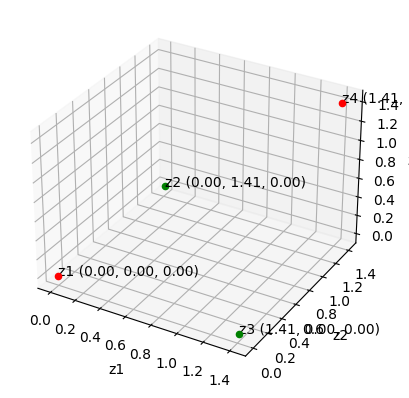

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the feature vectors in 3D space
points = [z1, z2, z3, z4]
colors = ['r', 'g', 'g', 'r']
labels = ['z1', 'z2', 'z3', 'z4']

for i, (point, color, label) in enumerate(zip(points, colors, labels)):
    ax.scatter(point[1], point[2], point[5], c=color, marker='o')
    ax.text(point[1], point[2], point[5], f"{label} ({point[1]:.2f}, {point[2]:.2f}, {point[5]:.2f})")

ax.set_xlabel('z1')
ax.set_ylabel('z2')
ax.set_zlabel('z6')

plt.show()

### (b), (c)
The dual objective for SVM can be written as

$$L(α) = -\frac{1}{2} α^TGα + ∑_{i=1}^4α_i$$

where G is a 4 × 4 matrix with $G(i, j) = y_i y_j \phi(x_i)^T \phi(x_j)$ Compute G matrix and $α$ that
maximize $L(α)$.

Hint: You will get a simple linear equation that the optimal solution must satisfy. Compute the
G matrix and solve the linear problem to get your answer.

**We have the XOR pattern data:**

X = [(0, 0), (0, 1), (1, 0), (1, 1)]

y = [-1, 1, 1, -1]


> The transformed feature vectors are:


$Φ(0, 0) = [1, 0, 0, 0, 0, 0]$

$Φ(0, 1) = [1, 0, √2, 0, 1, 0]$

$Φ(1, 0) = [1, √2, 0, 1, 0, 0]$

$Φ(1, 1) = [1, √2, √2, 1, 1, 2]$



> Now, let's compute the G matrix, with $G(i, j) = y_i y_j Φ(x_i)^T Φ(x_j):$



$G =
[[(-1)(-1)Φ(0,0)^TΦ(0,0) (-1)(1)Φ(0,0)^TΦ(0,1) (-1)(1)Φ(0,0)^TΦ(1,0) (-1)(-1)Φ(0,0)^TΦ(1,1)]$


$[(1)(-1)Φ(0,1)^TΦ(0,0) (1)(1)Φ(0,1)^TΦ(0,1) (1)(1)Φ(0,1)^TΦ(1,0) (1)(-1)Φ(0,1)^TΦ(1,1)]$


$[(1)(-1)Φ(1,0)^TΦ(0,0) (1)(1)Φ(1,0)^TΦ(0,1) (1)(1)Φ(1,0)^TΦ(1,0) (1)(-1)Φ(1,0)^TΦ(1,1)]$


$[(-1)(-1)Φ(1,1)^TΦ(0,0) (-1)(1)Φ(1,1)^TΦ(0,1) (-1)(1)Φ(1,1)^TΦ(1,0) (-1)(-1)Φ(1,1)^TΦ(1,1)]]$



> Calculating the dot products, we get:




$G =
[[1, -1, -1, 3]
[-1, 3, 1, -1]
[-1, 1, 3, -1]
[ 3, -1, -1, 7]]$



> Now, we need to find α that maximizes the dual objective:




$$L(α) = -\frac{1}{2} α^TGα + ∑_{i=1}^4α_i$$



> The constraints


$α_i ≥ 0$

$∑_{i=1}^4 y_iα_i = 0$



> We can find the optimal α by solving the following linear system:



$[y][α] = 0$

$[-1,1,1,-1][α_1, α_2, α_3, α_4]^T = 0$

For the SVM with the XOR problem, we can assume that $α_1$ = $α_4$ and $α_2 = α_3$. Then,

Assuming that $α_1 = α_4$ and $α_2 = α_3$, we have:

$-α_1 + α_2 + α_3 - α_4 = 0$

Substituting the assumed equalities:

$-α_1 + α_2 + α_2 - α_1 = 0$

Simplifying:

$2α_2 = 2α_1$

$α_2 = α_1$

Now that we have found the relationship between α_1 and α_2 (and also between α_3 and α_4), we can compute the optimal α values by maximizing the dual objective:

$$L(α) = -\frac{1}{2} α^TGα + ∑_{i=1}^4α_i$$

To maximize L(α), we need to compute the gradient and set it equal to zero:

$∇L(α)=−Gα+1=0$

Given the G matrix and the relationships between α values, we have:

$-Gα+1 = - \begin{bmatrix}
    1 & -1 & -1 & 3 \\
    -1 & 3 & 1 & -1 \\
    -1 & 1 & 3 & -1 \\
    3 & -1 & -1 & 7
  \end{bmatrix}
  \begin{bmatrix}
    α_1 \\
    α_1 \\
    α_1 \\
    α_1
  \end{bmatrix} + 1 = 0$

Solving for $α_1$:

$\begin{bmatrix}
    2 & 0 & 0 & 2 \\
    0 & 2 & 2 & 0 \\
    0 & 2 & 2 & 0 \\
    2 & 0 & 0 & 8
  \end{bmatrix}
  \begin{bmatrix}
    α_1 \\
    α_1 \\
    α_1 \\
    α_1
  \end{bmatrix} = \begin{bmatrix}
    1 \\
    1 \\
    1 \\
    1
  \end{bmatrix}$

$\begin{bmatrix}
    4 \\
    4 \\
    4 \\
    10
  \end{bmatrix} = α_1 \begin{bmatrix}
    1 \\
    1 \\
    1 \\
    1
  \end{bmatrix}$

From the first row, we get:

$4α_1 = 1$

$α_1 = \frac{1}{4}$

Now we have the optimal $α$ values:

$α = [α_1, α_2, α_3, α_4]^T = [\frac{1}{4}, \frac{1}{4}, \frac{1}{4}, \frac{1}{10}]^T$

### (d)
Compute the SVM weight vector $w = ∑_iα_iy_i\phi(x_i)$ and an expression for $h_w(x) = w^T\phi(x) = ∑_iα_iy_i\phi(x_i)^T\phi(x)$. Plot w and discuss which features in the 6D space have highest effect on classification.

In [24]:
X_transformed = np.array([
    [1, np.sqrt(2) * x[0], np.sqrt(2) * x[1], x[0] ** 2, x[1] ** 2, np.sqrt(2) * x[0] * x[1]] for x in X
])

w = np.sum(alpha * y * X_transformed.T, axis=1)
print("SVM weight vector w:", w)

SVM weight vector w: [ 0.11111111  0.15713484  0.15713484  0.11111111  0.11111111 -1.25707872]


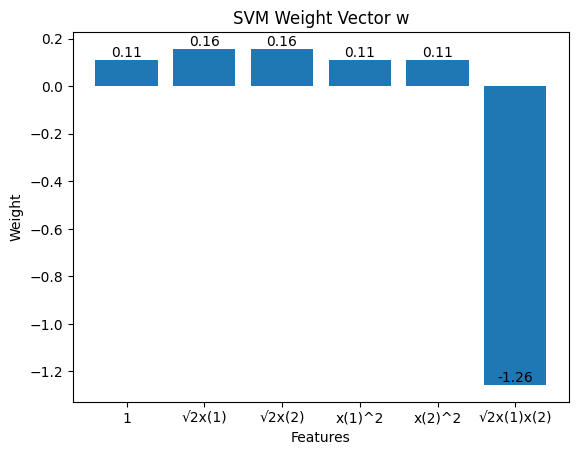

In [25]:
feature_names = ['1', '√2x(1)', '√2x(2)', 'x(1)^2', 'x(2)^2', '√2x(1)x(2)']
bar_plot = plt.bar(feature_names, w)

plt.title("SVM Weight Vector w")
plt.xlabel("Features")
plt.ylabel("Weight")

# Add value labels to the bars
for bar in bar_plot:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom",
    )

plt.show()

**The $\sqrt2x(1)$ and $\sqrt2x(2)$ features have the highest effect on classification**

## H 2.4 Support vector machines (SVM): (60 pts)

In [26]:
# Load MNIST dataset
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

# Extract only the images of digits "4" and "9"
X4 = X[y == '4', :]
X9 = X[y == '9', :]

# Split the data into training and testing sets
X_train_4, X_test_4 = X4[:4000], X4[4000:]
X_train_9, X_test_9 = X9[:4000], X9[4000:]
X_train = np.vstack((X_train_4, X_train_9))
X_test = np.vstack((X_test_4, X_test_9))
y_train = np.hstack((np.ones(X_train_4.shape[0]), -np.ones(X_train_9.shape[0])))
y_test = np.hstack((np.ones(X_test_4.shape[0]), -np.ones(X_test_9.shape[0])))

# Split the training set into two parts: for fitting the classifier and the holdout set
X_fit, X_holdout, y_fit, y_holdout = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Use a logarithmic grid of C values
C_values = np.logspace(-3, 3, 7)

# Train the SVM with a linear kernel using different values of C and find the best C value
best_C = None
best_error_rate = float("inf")

for C in C_values:
    clf = svm.SVC(C=C, kernel='linear')
    clf.fit(X_fit, y_fit)
    error_rate = 1 - clf.score(X_holdout, y_holdout)
    print(f"C: {C}, Error rate: {error_rate}")
    
    if error_rate < best_error_rate:
        best_error_rate = error_rate
        best_C = C

print(f"Best C value: {best_C}")

# Train the SVM on the entire training set with the best C value
clf = svm.SVC(C=best_C, kernel='linear')
clf.fit(X_train, y_train)

# Calculate the error rate on the testing set
test_error_rate = 1 - clf.score(X_test, y_test)
print(f"Test error rate: {test_error_rate}")

C: 0.001, Error rate: 0.04125000000000001
C: 0.01, Error rate: 0.04125000000000001
C: 0.1, Error rate: 0.04125000000000001
C: 1.0, Error rate: 0.04125000000000001
C: 10.0, Error rate: 0.04125000000000001
C: 100.0, Error rate: 0.04125000000000001
C: 1000.0, Error rate: 0.04125000000000001
Best C value: 0.001
Test error rate: 0.04271878242822558


### (a) 
Train an SVM using the kernels $k(u, v) = (u^T v + 1)^p$, p = 1, 2, that is, the inhomogeneous linear and quadratic kernel. To do this, you will want to set the parameters kernel=’poly’ and degree=1 or degree=2.

For each kernel, report the best value of C, the test error, and the number of data points that are support vectors  (returned via clf.support_vectors_). Turn in your code.

#### Loading and preparing the Dataset

In [27]:
# Load MNIST dataset
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

# Extract only the images of digits "4" and "9"
X4 = X[y == '4', :]
X9 = X[y == '9', :]

# Split the data into training and testing sets
X_train_4, X_test_4 = X4[:4000], X4[4000:]
X_train_9, X_test_9 = X9[:4000], X9[4000:]
X_train = np.vstack((X_train_4, X_train_9))
X_test = np.vstack((X_test_4, X_test_9))
y_train = np.hstack((np.ones(X_train_4.shape[0]), -np.ones(X_train_9.shape[0])))
y_test = np.hstack((np.ones(X_test_4.shape[0]), -np.ones(X_test_9.shape[0])))

# Normalize the input data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Split the training set into two parts: for fitting the classifier and the holdout set
X_fit, X_holdout, y_fit, y_holdout = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


#### Helper Functions

In [28]:
# Function to calculate the error rate with a polynomial kernel
def calculate_error_rate_poly_kernel(X, y, w, p):
    predictions = np.sign((np.dot(X, w) + 1) ** p)
    return 1 - np.mean(predictions == y)

#### Main Function

In [29]:
# Function to train a linear SVM using the PEGASOS algorithm with a polynomial kernel
def train_svm_poly_kernel(X, y, C, p, epochs=100, learning_rate=1e-3):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)

    for epoch in range(epochs):
        for i in range(n_samples):
            eta = learning_rate / (epoch + 1)
            K = (np.dot(X[i], w) + 1) ** p
            if y[i] * K < 1:
                w = (1 - eta) * w + eta * C * y[i] * X[i] * (K / (np.dot(X[i], w) + 1)) ** (p - 1)
            else:
                w = (1 - eta) * w

    return w

#### The Implementation

In [30]:
# Use a logarithmic grid of C values
C_values = np.logspace(-3, 3, 7)

# Train the SVM with polynomial kernels for degree 1 and 2
for degree in [1, 2]:
    best_C = None
    best_error_rate = float("inf")

    for C in C_values:
        w = train_svm_poly_kernel(X_fit, y_fit, C, degree)
        error_rate = calculate_error_rate_poly_kernel(X_holdout, y_holdout, w, degree)
        print(f"For Degree: {degree}, and C: {C}, the Error rate is: {error_rate}")

        if error_rate < best_error_rate:
            best_error_rate = error_rate
            best_C = C

    print()
    print(f"For Degree: {degree}, The Best C value is: {best_C}")
    print()

    # Train the SVM on the entire training set with the best C value
    w = train_svm_poly_kernel(X_train, y_train, best_C, degree)

    # Calculate the error rate on the testing set
    test_error_rate = calculate_error_rate_poly_kernel(X_test, y_test, w, degree)
    print(f"For Degree: {degree}, Test error rate is: {test_error_rate}")
    print()

    # Train the SVM on the entire training set with the best C value to get support vectors
    w_full = train_svm_poly_kernel(X_train, y_train, best_C, degree)
    margin = 1 / np.linalg.norm(w_full)
    support_vectors = X_train[np.abs(y_train - (np.dot(X_train, w_full) + 1) ** degree) < margin]
    num_support_vectors = support_vectors.shape[0]

    print(f"For Degree: {degree}, Number of support vectors are: {num_support_vectors}")
    print('*'*50)
    print()

For Degree: 1, and C: 0.001, the Error rate is: 0.49750000000000005
For Degree: 1, and C: 0.01, the Error rate is: 0.49750000000000005
For Degree: 1, and C: 0.1, the Error rate is: 0.49750000000000005
For Degree: 1, and C: 1.0, the Error rate is: 0.06374999999999997
For Degree: 1, and C: 10.0, the Error rate is: 0.034375000000000044
For Degree: 1, and C: 100.0, the Error rate is: 0.02562500000000001
For Degree: 1, and C: 1000.0, the Error rate is: 0.02124999999999999

For Degree: 1, The Best C value is: 1000.0

For Degree: 1, Test error rate is: 0.45451400899342786

For Degree: 1, Number of support vectors are: 101
**************************************************

For Degree: 2, and C: 0.001, the Error rate is: 0.49750000000000005
For Degree: 2, and C: 0.01, the Error rate is: 0.49750000000000005
For Degree: 2, and C: 0.1, the Error rate is: 0.49750000000000005
For Degree: 2, and C: 1.0, the Error rate is: 0.49750000000000005
For Degree: 2, and C: 10.0, the Error rate is: 0.497500000

<ipython-input-29-ef5595271949>:9: RuntimeWarning: overflow encountered in double_scalars
  K = (np.dot(X[i], w) + 1) ** p
<ipython-input-29-ef5595271949>:11: RuntimeWarning: invalid value encountered in multiply
  w = (1 - eta) * w + eta * C * y[i] * X[i] * (K / (np.dot(X[i], w) + 1)) ** (p - 1)


For Degree: 2, and C: 100.0, the Error rate is: 1.0
For Degree: 2, and C: 1000.0, the Error rate is: 1.0

For Degree: 2, The Best C value is: 0.001

For Degree: 2, Test error rate is: 0.5115876859218264

For Degree: 2, Number of support vectors are: 8000
**************************************************



### b
Repeat the above using the radial basis function kernel $k(u, v) = e^{− γ||u−vk||^2}$ (by setting the parameters kernel='rbf', gamma=gamma. You will now need to determine the best value for both C and $γ$ Report the best value of C and $γ$ the test error, and the number of support vectors.

In [31]:
# Use a logarithmic grid of C and gamma values
C_values = np.logspace(-3, 3, 7)
gamma_values = np.logspace(-3, 3, 7)

best_C = None
best_gamma = None
best_error_rate = float("inf")

for C in C_values:
    for gamma in gamma_values:
        clf = svm.SVC(C=C, kernel='rbf', gamma=gamma)
        clf.fit(X_fit, y_fit)
        error_rate = 1 - clf.score(X_holdout, y_holdout)
        print(f"C: {C}, Gamma: {gamma}, Error rate: {error_rate}")

        if error_rate < best_error_rate:
            best_error_rate = error_rate
            best_C = C
            best_gamma = gamma
print()
print(f"The Best C value is: {best_C}, and The Best Gamma value is: {best_gamma}")
print()

# Train the SVM on the entire training set with the best C and gamma values
clf = svm.SVC(C=best_C, kernel='rbf', gamma=best_gamma)
clf.fit(X_train, y_train)

# Calculate the error rate on the testing set
test_error_rate = 1 - clf.score(X_test, y_test)
print(f"Test error rate =  {test_error_rate}")
print()

# Number of support vectors
num_support_vectors = clf.support_vectors_.shape[0]
print(f"Number of support vectors =  {num_support_vectors}")

C: 0.001, Gamma: 0.001, Error rate: 0.5025
C: 0.001, Gamma: 0.01, Error rate: 0.5025
C: 0.001, Gamma: 0.1, Error rate: 0.5025
C: 0.001, Gamma: 1.0, Error rate: 0.5025
C: 0.001, Gamma: 10.0, Error rate: 0.5025
C: 0.001, Gamma: 100.0, Error rate: 0.5025
C: 0.001, Gamma: 1000.0, Error rate: 0.5025
C: 0.01, Gamma: 0.001, Error rate: 0.48
C: 0.01, Gamma: 0.01, Error rate: 0.06000000000000005
C: 0.01, Gamma: 0.1, Error rate: 0.5025
C: 0.01, Gamma: 1.0, Error rate: 0.5025
C: 0.01, Gamma: 10.0, Error rate: 0.5025
C: 0.01, Gamma: 100.0, Error rate: 0.5025
C: 0.01, Gamma: 1000.0, Error rate: 0.5025
C: 0.1, Gamma: 0.001, Error rate: 0.05312499999999998
C: 0.1, Gamma: 0.01, Error rate: 0.020625000000000004
C: 0.1, Gamma: 0.1, Error rate: 0.18374999999999997
C: 0.1, Gamma: 1.0, Error rate: 0.5025
C: 0.1, Gamma: 10.0, Error rate: 0.5025
C: 0.1, Gamma: 100.0, Error rate: 0.5025
C: 0.1, Gamma: 1000.0, Error rate: 0.5025
C: 1.0, Gamma: 0.001, Error rate: 0.03125
C: 1.0, Gamma: 0.01, Error rate: 0.00875

### (c)
For each kernel, turn in a 4 × 4 subplot showing images of the 16 support vectors that violate the margin by the greatest amount (these are, in a sense, the “hardest” examples to classify), and explain how these are determined. Above each subplot, indicate the true label (4 or 9).

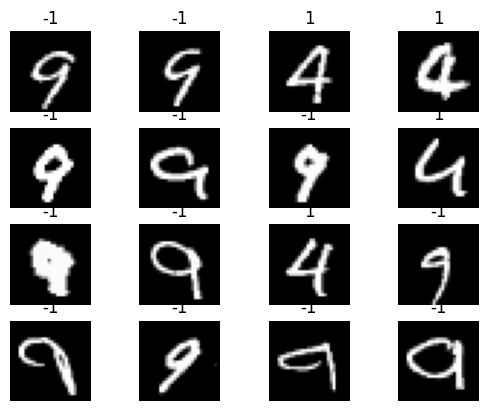

In [32]:
# Get the support vectors and their labels
support_vectors = clf.support_vectors_
support_labels = y_train[clf.support_]

# Calculate the signed distance from each support vector to the decision boundary
distances = clf.decision_function(support_vectors)

# Get the indices of the 16 support vectors with the highest distance violation
violation_indices = np.argsort(np.abs(distances))[-16:]

# Plot the 16 support vectors with the highest distance violation
f, axarr = plt.subplots(4, 4)
for i, idx in enumerate(violation_indices):
    axarr[i // 4, i % 4].imshow(support_vectors[idx].reshape((28, 28)), cmap='gray')
    axarr[i // 4, i % 4].set_title(f"{int(support_labels[idx])}")
    axarr[i // 4, i % 4].axis('off')

plt.show()

# Submission

In [ ]:
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended